In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\chordiyg\OneDrive - NEUMAN & ESSER\Desktop\SVM\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southeast':3,'northwest':2,'southwest':1,'northeast':0})

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


<AxesSubplot: xlabel='charges', ylabel='bmi'>

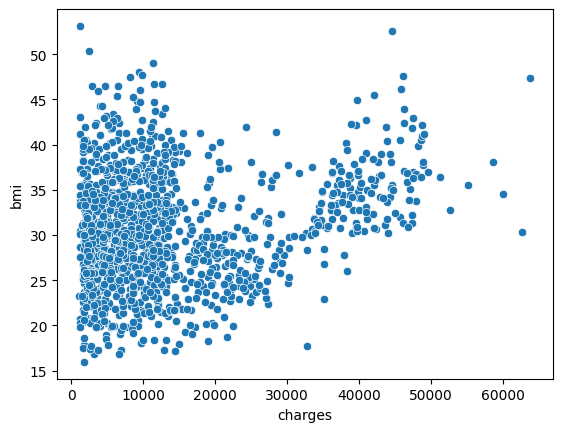

In [10]:
import seaborn as sns
sns.scatterplot(x='charges',y='bmi',data=df)

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
Scaler=MinMaxScaler()
data=Scaler.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [16]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [17]:
lr.score(x_test,y_test)

0.7986800627985717

In [18]:
import pickle

In [19]:
with open('model.pkl','wb')as f:
    pickle.dump(model,f)
    